# Análises casa de ração

### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Populando o dataframe

In [3]:
np.random.seed(42)
date_range = pd.date_range(start=datetime(2023, 1, 1), end=datetime(2023, 12, 31), freq='D')
n = 250

produtos = ['Special Dog', 'Pedigree', 'Royal Canin', 'Whiskas', 'Gran Plus', 'Special Cat', 'Megazoo', 'Nutrópica', 'Poytara']
categorias = ['Ração para cães', 'Ração para gatos', 'Ração para aves']
cidades =  ['Torrinha', 'Brotas', 'Jaú', 'Bauru']

produto_categoria = {
    'Special Dog': 'Ração para cães',
    'Pedigree': 'Ração para cães',
    'Royal Canin': 'Ração para cães',
    'Whiskas': 'Ração para gatos',
    'Gran Plus': 'Ração para gatos',
    'Special Cat': 'Ração para gatos',
    'Megazoo': 'Ração para aves',
    'Nutrópica': 'Ração para aves',
    'Poytara': 'Ração para aves'
}

ids_produto = {
    'Special Dog': 1,
    'Pedigree': 2,
    'Royal Canin': 3,
    'Whiskas': 4,
    'Gran Plus': 5,
    'Special Cat': 6,
    'Megazoo': 7,
    'Nutrópica': 8,
    'Poytara': 9
}

preço_produto = { 
    'Special Dog': 12.50,
    'Pedigree': 18.00,
    'Royal Canin': 45.00,
    'Whiskas': 25.00,
    'Gran Plus': 22.00,
    'Special Cat': 20.00,
    'Megazoo': 15.00,
    'Nutrópica': 35.00,
    'Poytara': 30.00
}

ids_cidade = {
    'Torrinha' : 1,
    'Brotas' : 2,
    'Jaú' : 3,
    'Bauru' : 4
}

Nome_Produto = np.random.choice(produtos, size=n)
ID_Produto = [ids_produto[produto] for produto in Nome_Produto]
Categoria = [produto_categoria[produto] for produto in Nome_Produto]
Preço = [preço_produto[preço] for preço in Nome_Produto]
Quantidade_Vendida = np.random.randint(100, 5000, size=n)/1000 #KG de ração
Localidade_Loja = np.random.choice(cidades, size=n)
ID_Loja = [ids_cidade[cidade] for cidade in Localidade_Loja]
Data_Venda = np.random.choice(date_range, size=n)
Total_Venda = Preço*Quantidade_Vendida.round(2)

# Combinando os dados em um array
dataset = {
    'ID do produto': ID_Produto,
    'Nome do produto': Nome_Produto,
    'Categoria': Categoria,
    'Preço': Preço,
    'Quantidade vendida': Quantidade_Vendida,
    'Total da venda': Total_Venda,
    'ID da loja': ID_Loja,
    'Localidade': Localidade_Loja,
    'Data da venda': Data_Venda
}

# Convertendo para DataFrame para visualização
df = pd.DataFrame(dataset)
df['Quantidade vendida'] = df['Quantidade vendida'].astype(float)
df['ID do produto'] = df['ID do produto'].astype(int)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID do produto       250 non-null    int64         
 1   Nome do produto     250 non-null    object        
 2   Categoria           250 non-null    object        
 3   Preço               250 non-null    float64       
 4   Quantidade vendida  250 non-null    float64       
 5   Total da venda      250 non-null    float64       
 6   ID da loja          250 non-null    int64         
 7   Localidade          250 non-null    object        
 8   Data da venda       250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 17.7+ KB


,ID do produto,Nome do produto,Categoria,Preço,Quantidade vendida,Total da venda,ID da loja,Localidade,Data da venda
0,7,Megazoo,Ração para aves,15.0,1.318,19.8,3,Jaú,2023-08-10
1,4,Whiskas,Ração para gatos,25.0,4.596,115.0,2,Brotas,2023-09-08
2,8,Nutrópica,Ração para aves,35.0,4.835,169.4,3,Jaú,2023-11-09
3,5,Gran Plus,Ração para gatos,22.0,3.204,70.4,4,Bauru,2023-04-22
4,7,Megazoo,Ração para aves,15.0,2.835,42.6,1,Torrinha,2023-09-12


## Análises

### Análise exploratória

1) Qual é o total de vendas por produto?


* Em Kg:

In [5]:
df.groupby('Nome do produto')['Quantidade vendida'].sum().sort_values(ascending=False).round(2)

Nome do produto
Special Dog    93.40
Nutrópica      90.60
Royal Canin    79.35
Megazoo        78.14
Poytara        75.88
Whiskas        70.11
Pedigree       61.47
Gran Plus      50.66
Special Cat    50.21
Name: Quantidade vendida, dtype: float64

* Em reais:

In [6]:
df.groupby('Nome do produto')['Total da venda'].sum().sort_values(ascending=False)

Nome do produto
Royal Canin    3570.75
Nutrópica      3171.70
Poytara        2276.10
Whiskas        1753.25
Megazoo        1172.25
Special Dog    1168.00
Gran Plus      1114.74
Pedigree       1106.82
Special Cat    1003.80
Name: Total da venda, dtype: float64

2) Qual é a loja que vendeu mais produtos?


* Em Kg:

In [7]:
df.groupby('Localidade')['Quantidade vendida'].sum().sort_values(ascending=False)[:1].round(2)

Localidade
Torrinha    216.74
Name: Quantidade vendida, dtype: float64

* Em reais:

In [8]:
df.groupby('Localidade')['Total da venda'].sum().sort_values(ascending=False)[:1].round(2)

Localidade
Torrinha    4924.0
Name: Total da venda, dtype: float64

3) Qual categoria de produto teve mais vendas em termos de quantidade?


In [9]:
df.groupby('Categoria')['Quantidade vendida'].sum().sort_values(ascending=False)[:1].round(2)

Categoria
Ração para aves    244.62
Name: Quantidade vendida, dtype: float64


### Análise Temporal:


1) Identifique qual mês do ano teve mais vendas (quantidade) e qual mês gerou mais receita (valor total de vendas).


* Em kg:

In [10]:
df['Mês'] = df['Data da venda'].dt.month
df.groupby('Mês')['Quantidade vendida'].sum().sort_values(ascending=False)[:1].round(2)

Mês
11    82.46
Name: Quantidade vendida, dtype: float64

* Em reais:

In [11]:
df['Mês'] = df['Data da venda'].dt.month
df.groupby('Mês')['Total da venda'].sum().sort_values(ascending=False)[:1]

Mês
11    2180.89
Name: Total da venda, dtype: float64

### Agrupamento de Dados:

1) Agrupe os dados por categoria e calcule a média de vendas por produto dentro de cada categoria.


* Em Kg:

In [12]:
df.groupby(['Categoria', 'Nome do produto'])['Quantidade vendida'].mean().round(2)

Categoria         Nome do produto
Ração para aves   Megazoo            2.52
                  Nutrópica          2.92
                  Poytara            2.53
Ração para cães   Pedigree           2.67
                  Royal Canin        2.64
                  Special Dog        2.92
Ração para gatos  Gran Plus          2.20
                  Special Cat        2.51
                  Whiskas            2.34
Name: Quantidade vendida, dtype: float64

* Em reais:

In [13]:
df.groupby(['Categoria', 'Nome do produto'])['Total da venda'].mean().round(2)

Categoria         Nome do produto
Ração para aves   Megazoo             37.81
                  Nutrópica          102.31
                  Poytara             75.87
Ração para cães   Pedigree            48.12
                  Royal Canin        119.02
                  Special Dog         36.50
Ração para gatos  Gran Plus           48.47
                  Special Cat         50.19
                  Whiskas             58.44
Name: Total da venda, dtype: float64

2) Quais produtos tiveram as melhores vendas em cada localidade?

* Em Kg:

In [14]:
df.groupby(['Localidade', 'Nome do produto'])['Quantidade vendida'].sum().groupby('Localidade').idxmax()

Localidade
Bauru            (Bauru, Nutrópica)
Brotas        (Brotas, Royal Canin)
Jaú                (Jaú, Nutrópica)
Torrinha    (Torrinha, Special Dog)
Name: Quantidade vendida, dtype: object

* Em reais:

In [15]:
df.groupby(['Localidade', 'Nome do produto'])['Total da venda'].sum().groupby('Localidade').idxmax()

Localidade
Bauru        (Bauru, Royal Canin)
Brotas      (Brotas, Royal Canin)
Jaú              (Jaú, Nutrópica)
Torrinha    (Torrinha, Nutrópica)
Name: Total da venda, dtype: object

### Criação de Gráficos:

1) Crie gráficos de barras para visualizar as vendas por produto e por loja.


* Vendas por produto:

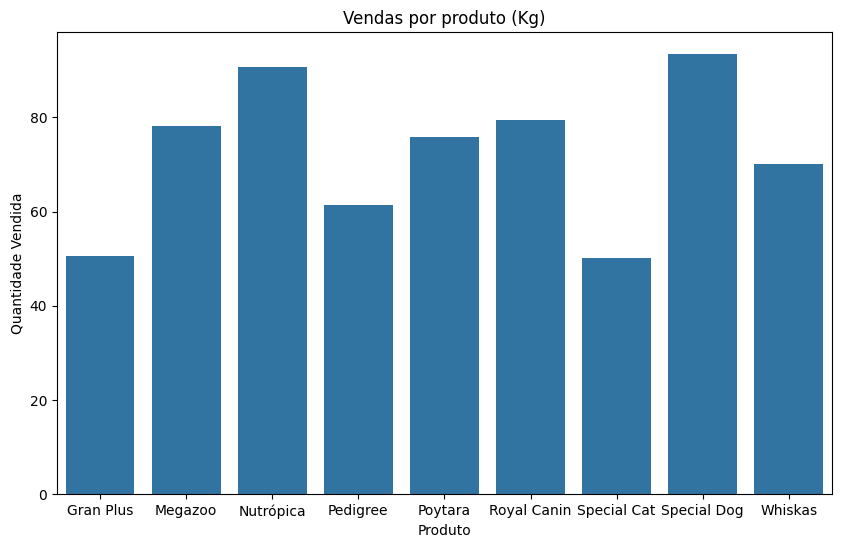

In [25]:
vendas_por_produto = df.groupby('Nome do produto')['Quantidade vendida'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Nome do produto', y='Quantidade vendida', data=vendas_por_produto)
plt.title('Vendas por produto (Kg)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

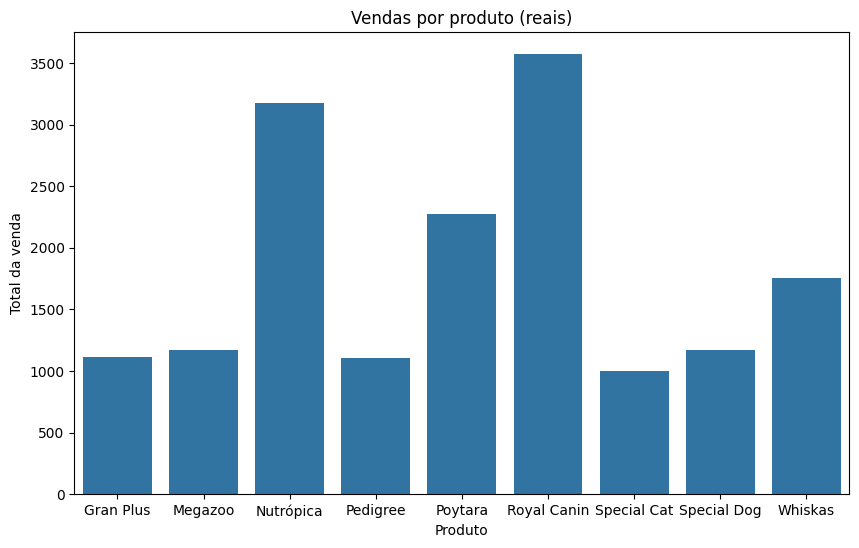

In [23]:
vendas_por_produto = df.groupby('Nome do produto')['Total da venda'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Nome do produto', y='Total da venda', data=vendas_por_produto)
plt.title('Vendas por produto (reais)')
plt.xlabel('Produto')
plt.ylabel('Total da venda')
plt.show()

* Vendas por loja:

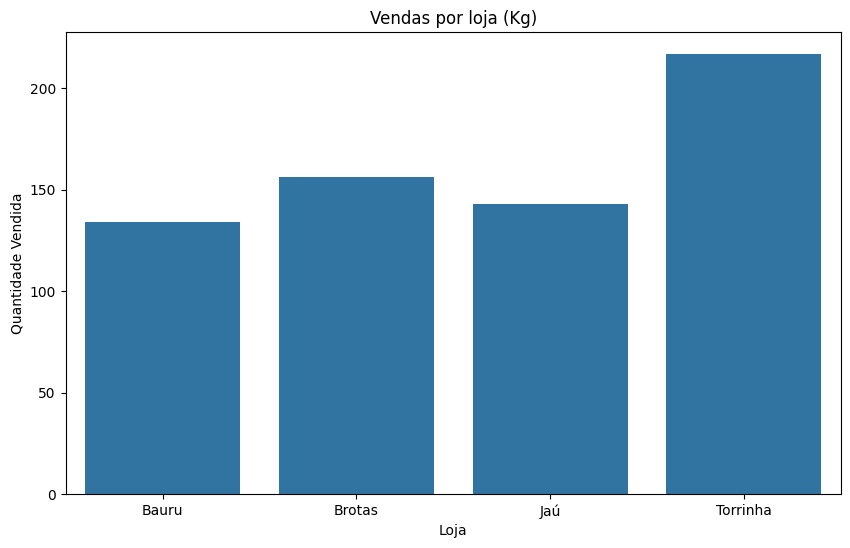

In [18]:
vendas_por_loja = df.groupby('Localidade')['Quantidade vendida'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Localidade', y='Quantidade vendida', data=vendas_por_loja)
plt.title('Vendas por loja (Kg)')
plt.xlabel('Loja')
plt.ylabel('Quantidade Vendida')
plt.show()

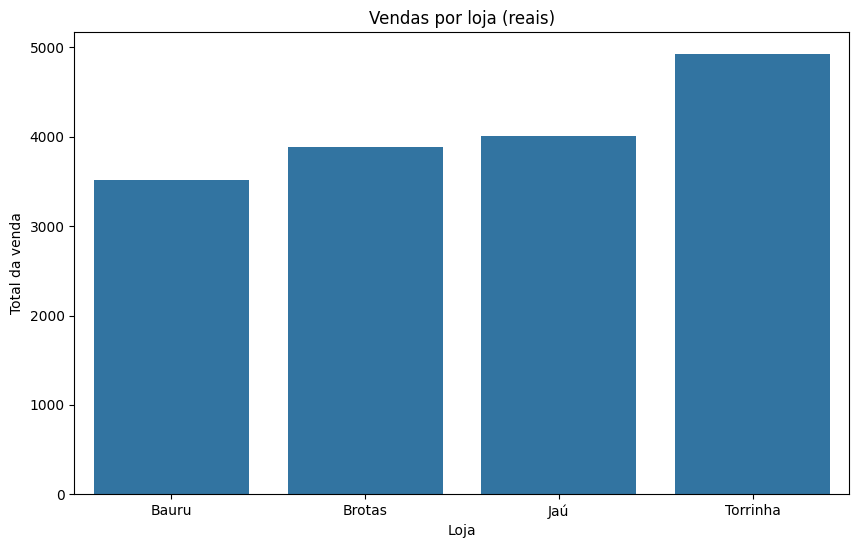

In [19]:
vendas_por_loja = df.groupby('Localidade')['Total da venda'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Localidade', y='Total da venda', data=vendas_por_loja)
plt.title('Vendas por loja (reais)')
plt.xlabel('Loja')
plt.ylabel('Total da venda')
plt.show()

2) Crie um gráfico de linha para mostrar a evolução das vendas ao longo do tempo.

* Em Kg:

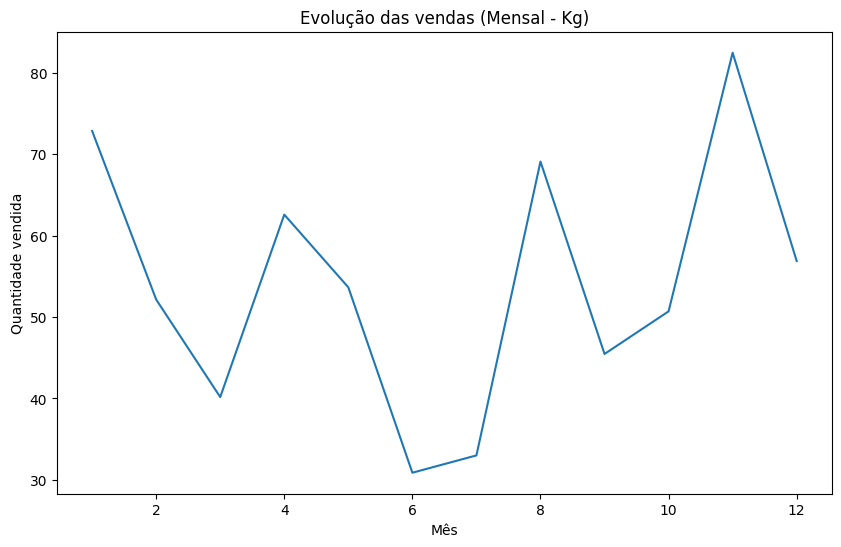

In [28]:
df['Mês'] = df['Data da venda'].dt.month
vendas_por_mes = df.groupby('Mês')['Quantidade vendida'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Mês', y='Quantidade vendida', data=vendas_por_mes)

plt.title('Evolução das vendas (Mensal - Kg)')
plt.xlabel('Mês')
plt.ylabel('Quantidade vendida')
plt.show()

* Em reais:

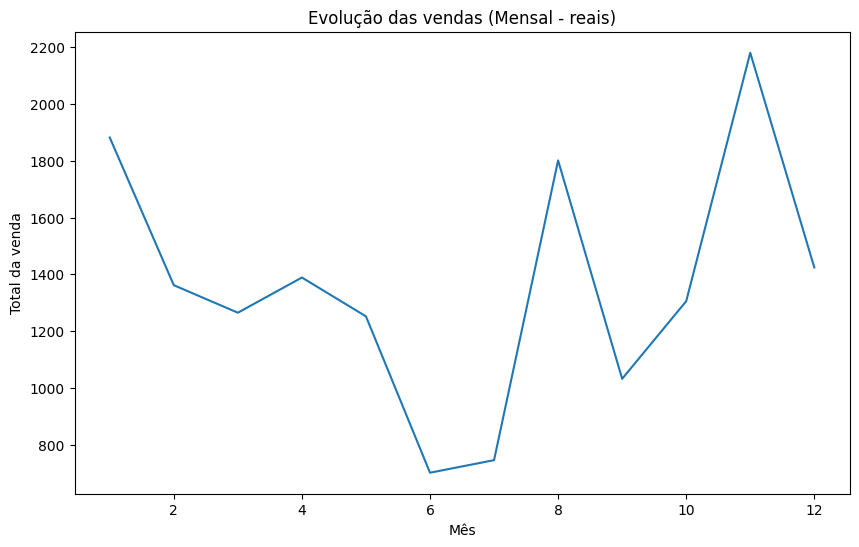

In [21]:
df['Mês'] = df['Data da venda'].dt.month
vendas_por_mes = df.groupby('Mês')['Total da venda'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Mês', y='Total da venda', data=vendas_por_mes)

plt.title('Evolução das vendas (Mensal - reais)')
plt.xlabel('Mês')
plt.ylabel('Total da venda')
plt.show()